In [103]:
import glob
import cv2
import numpy as np
from skimage import io

In [104]:
board_size = (7, 5)

In [107]:
def get_corners(w, h):
    '''get_corners
    '''
    # x, y, z, row first
    pworld = np.zeros((h, w, 3), dtype=np.float32) 
    grid_x, grid_y = np.meshgrid(range(w), range(h))

    pworld[:, :, 0] = grid_x
    pworld[:, :, 1] = grid_y

    return pworld.reshape(-1, 3)

[[[0. 0. 0.]
  [1. 0. 0.]
  [2. 0. 0.]
  [3. 0. 0.]
  [4. 0. 0.]
  [5. 0. 0.]
  [6. 0. 0.]]

 [[0. 1. 0.]
  [1. 1. 0.]
  [2. 1. 0.]
  [3. 1. 0.]
  [4. 1. 0.]
  [5. 1. 0.]
  [6. 1. 0.]]

 [[0. 2. 0.]
  [1. 2. 0.]
  [2. 2. 0.]
  [3. 2. 0.]
  [4. 2. 0.]
  [5. 2. 0.]
  [6. 2. 0.]]

 [[0. 3. 0.]
  [1. 3. 0.]
  [2. 3. 0.]
  [3. 3. 0.]
  [4. 3. 0.]
  [5. 3. 0.]
  [6. 3. 0.]]

 [[0. 4. 0.]
  [1. 4. 0.]
  [2. 4. 0.]
  [3. 4. 0.]
  [4. 4. 0.]
  [5. 4. 0.]
  [6. 4. 0.]]]


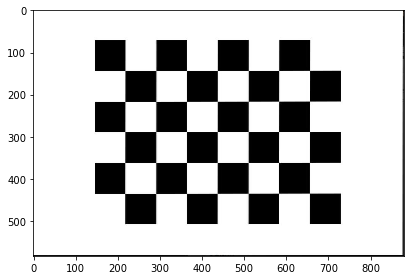

In [108]:
points_world = []
points_pixel = []
criteria = (cv2.TERM_CRITERIA_MAX_ITER + cv2.TERM_CRITERIA_EPS, 30, 0.001)

for path in glob.glob('./*.jpg'):
    
    im = cv2.imread(path)
    im_size = im.shape
    
    im_gray = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)
    
    io.imshow(im_gray)
    
    r, corners = cv2.findChessboardCorners(im_gray, board_size, None)
    
    if r:
        points_world.append(get_corners(*board_size))
        
        corners = cv2.cornerSubPix(im_gray, corners, winSize=(11, 11), zeroZone=(-1, -1), criteria=criteria)
        
        points_pixel.append(corners)
        
        # im = cv2.drawChessboardCorners(im, board_size, corners, r)
        # io.imshow(im)
        
        
r, matx, dist, rvec, tvec = cv2.calibrateCamera(points_world, points_pixel, board_size, None, None)


matx_new, (x, y, w, h) = cv2.getOptimalNewCameraMatrix(matx, dist, im_size[:-1][::-1], 1, im_size[:-1][::-1])

im_dist = cv2.undistort(im, matx, dist, None, matx_new)

io.imshow(im_dist)